## Imports

In [1]:
import numpy as np 
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt

## Load Data

In [2]:
DATA_PATH = Path('./data')
AIR_GHG = DATA_PATH / 'OECD' / 'AIR_GHG.csv'

df = pd.read_csv(AIR_GHG)

## Data Exploration

In [3]:
df.columns

Index(['COU', 'Country', 'POL', 'Pollutant', 'VAR', 'Variable', 'YEA', 'Year',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [4]:
df.head()

,COU,Country,POL,Pollutant,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1990,1990,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,424998.381,NaN,NaN
1,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1991,1991,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,426015.210,NaN,NaN
2,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1992,1992,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430216.380,NaN,NaN
3,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1993,1993,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430612.556,NaN,NaN
4,AUS,Australia,GHG,Greenhouse gases,TOTAL,Total emissions excluding LULUCF,1994,1994,T_CO2_EQVT,Tonnes of CO2 equivalent,3,Thousands,NaN,NaN,430653.332,NaN,NaN


In [5]:
df.Country.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States', 'Chile', 'Estonia',
       'Israel', 'Russia', 'Slovenia', 'Latvia', 'Lithuania',
       'OECD - Total', 'OECD - Europe', 'Brazil',
       "China (People's Republic of)", 'Colombia', 'Costa Rica', 'India',
       'Indonesia', 'South Africa', 'Argentina',
       'European Union (28 countries)'], dtype=object)

In [6]:
df.describe()

,YEA,Year,PowerCode Code,Reference Period Code,Reference Period,Value
count,52578.000000,52578.000000,52578.000000,0.0,0.0,5.257800e+04
mean,2003.962741,2003.962741,1.434726,NaN,NaN,1.421543e+05
std,8.258551,8.258551,1.498593,NaN,NaN,1.652310e+06
min,1990.000000,1990.000000,0.000000,NaN,NaN,-1.479158e+06
25%,1997.000000,1997.000000,0.000000,NaN,NaN,1.718825e+01
50%,2004.000000,2004.000000,0.000000,NaN,NaN,1.014720e+02
75%,2011.000000,2011.000000,3.000000,NaN,NaN,7.697484e+03
max,2018.000000,2018.000000,3.000000,NaN,NaN,9.731788e+07


## Resolve Power

In [7]:
df.Value = df.Value * 10 **  df['PowerCode Code']

## Filter only for totals

In [8]:
df = df[df['VAR'] == 'TOTAL']

## Drop Estimates

In [9]:
df = df[df['Flag Codes'].isnull()]

## Delete unneaded columns

In [10]:
df = df.drop(labels=['COU','Pollutant', 'VAR', 'Variable', 'Year', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'], axis=1)

## Normalize Data

In [11]:
DATA_PATH = Path('./data')
HISTPOP = DATA_PATH / 'OECD' / 'HISTPOP.csv'

pop = pd.read_csv(HISTPOP)
pop = pop[pop.SEX == 'T']
pop = pop[pop.AGE == 'TOTAL']

#

for i in df.index:
    df['Value'][i]=  df['Value'][i] / pop[(pop.Country == 'Austria') & (pop.Time == 2018)].Value

## Transform data into years

In [12]:
df = df.pivot(index=['Country', 'POL'], columns='YEA', values=['Value']).reset_index()

df['2019'] = np.NaN
df['2020'] = np.NaN

## Extract Polution Type

In [13]:
CH4 = df[df['POL'] == 'CH4']
CO2 = df[df['POL'] == 'CO2']
HFC = df[df['POL'] == 'HFC']
HFC_PFC = df[df['POL'] == 'HFC_PFC']
N2O = df[df['POL'] == 'N2O']
NF3 = df[df['POL'] == 'NF3']
PFC = df[df['POL'] == 'PFC']
SF6 = df[df['POL'] == 'SF6']

In [14]:
CH4 = CH4.drop(labels=['POL'], axis=1)
CO2 = CO2.drop(labels=['POL'], axis=1)
HFC = HFC.drop(labels=['POL'], axis=1)
HFC_PFC = HFC_PFC.drop(labels=['POL'], axis=1)
N2O = N2O.drop(labels=['POL'], axis=1)
NF3 = NF3.drop(labels=['POL'], axis=1)
PFC = PFC.drop(labels=['POL'], axis=1)
SF6 = SF6.drop(labels=['POL'], axis=1)

In [15]:
CH4

Country      Value                        \
YEA                                      1990       1991       1992   
0                        Argentina   9.039844   9.193532   9.335974   
7                        Australia  14.074146  14.065738  14.001529   
14                         Austria   1.175810   1.161681   1.129439   
22                         Belgium   1.382167   1.378035   1.369048   
30                          Brazil  26.658499  27.337974  27.765686   
36                          Canada  10.238510  10.435190  10.923016   
44                           Chile   1.459035   1.437191   1.452961   
51    China (People's Republic of)        NaN        NaN        NaN   
58                        Colombia   3.269703   3.332470   3.452342   
64                      Costa Rica        NaN        NaN        NaN   
70                  Czech Republic   2.662217   2.484774   2.333560   
78                         Denmark   0.898639   0.919549   0.927426   
85                         Estonia   0.215134   0.206237   0.178936   
92   European Union (28 countries)  82.481452  80.047127  78.303701   
101                        Finland   0.869526   0.867479   0.861884   
108                         France   7.906723   7.986709   7.966959   
116                        Germany  13.713116  13.014595  12.609083   
125                         Greece   1.249447   1.249301   1.257896   
132                        Hungary   1.326339   1.295915   1.148736   
139                        Iceland   0.069089   0.068791   0.069995   
146                          India        NaN        NaN        NaN   
153                      Indonesia        NaN        NaN        NaN   
158                        Ireland   1.670195   1.690534   1.703282   
166                         Israel        NaN        NaN        NaN   
173                          Italy   5.459277   5.558744   5.541828   
182                          Japan   5.026019   4.894904   4.992099   
190                          Korea   3.414121   3.407784   3.343175   
197                         Latvia   0.406776   0.401624   0.346139   
203                      Lithuania   0.792740   0.768912   0.670688   
210                     Luxembourg   0.065814   0.067227   0.065443   
216                         Mexico  10.342319  10.291401  10.256990   
223                    Netherlands   3.603561   3.649454   3.605471   
230                    New Zealand   3.653392   3.667494   3.625180   
237                         Norway   0.682533   0.676353   0.684741   
246                         Poland   7.897632   7.344690   7.140381   
253                       Portugal   1.085161   1.098972   1.104576   
260                         Russia  52.472396  49.912662  46.716452   
268                Slovak Republic   0.820928   0.787245   0.715552   
275                       Slovenia   0.287855   0.277049   0.278961   
282                   South Africa   4.878517        NaN        NaN   
286                          Spain   4.029238   3.900736   3.980239   
294                         Sweden   0.839454   0.839025   0.854293   
301                    Switzerland   0.683901   0.675859   0.666482   
309                         Turkey   4.798197   4.897805   4.887368   
316                 United Kingdom  15.055990  15.140984  15.104679   
324                  United States  87.625618  88.129256  88.004050   

                                                                       ...  \
YEA       1993       1994       1995       1996       1997       1998  ...   
0     9.508391   9.364366   9.303181   9.265743   9.061679   9.110429  ...   
7    13.591525  13.220052  13.030335  13.052680  13.374401  13.256122  ...   
14    1.119907   1.087110   1.078380   1.044120   1.009922   0.989597  ...   
22    1.363066   1.368225   1.376839   1.358909   1.346269   1.327390  ...   
30   27.951028  28.502303  29.125202  28.421513  28.825463  29.134367  ...   
36   11.302886  11.736497  12.179877  12.585795  12.416944  12.500118  .

In [16]:
CO2

Country       Value                          \
YEA                                       1990        1991        1992   
1                        Argentina   11.420691   12.420121   12.707866   
8                        Australia   31.504174   31.668018   32.238276   
15                         Austria    7.029504    7.436944    6.812182   
23                         Belgium   13.613185   13.960870   13.861949   
31                          Brazil   25.063062   26.480964   26.813403   
37                          Canada   52.289282   51.200467   52.845995   
45                           Chile    3.789459    3.661683    3.834817   
52    China (People's Republic of)         NaN         NaN         NaN   
59                        Colombia    5.241076    5.529001    5.965889   
65                      Costa Rica         NaN         NaN         NaN   
71                  Czech Republic   18.579956   16.847597   16.363862   
79                         Denmark    6.205872    7.403317    6.743332   
86                         Estonia    4.176110    3.836037    2.757555   
93   European Union (28 countries)  505.360478  499.404826  483.361657   
102                        Finland    6.446454    6.249404    6.142490   
109                         France   45.634828   48.533755   47.323477   
117                        Germany  119.074840  114.758242  109.291903   
126                         Greece    9.439728    9.436964    9.615923   
133                        Hungary    8.312660    7.896225    7.062459   
140                        Iceland    0.254342    0.240833    0.257337   
147                          India         NaN         NaN         NaN   
154                      Indonesia         NaN         NaN         NaN   
159                        Ireland    3.727701    3.810265    3.790002   
167                         Israel         NaN         NaN         NaN   
174                          Italy   49.561363   49.508158   49.541109   
183                          Japan  131.073740  132.394718  133.489388   
191                          Korea   28.513278   31.099809   33.915472   
198                         Latvia    2.206922    2.012187    1.593154   
204                      Lithuania    4.047635    4.282965    2.398878   
211                     Luxembourg    1.340578    1.410523    1.384088   
217                         Mexico   35.646327   36.662285   36.982494   
224                    Netherlands   18.374122   19.325871   19.307072   
231                    New Zealand    2.879286    2.954430    3.180132   
238                         Norway    3.996662    3.826384    3.930290   
247                         Poland   42.606812   42.295283   41.263856   
254                       Portugal    5.101207    5.313625    5.758187   
261                         Russia  285.740835  271.108553  221.512084   
269                Slovak Republic    6.973920    6.046580    5.547721   
276                       Slovenia    1.707891    1.584262    1.584885   
283                   South Africa   31.787861         NaN         NaN   
287                          Spain   26.162166   27.264201   28.266743   
295                         Sweden    6.489107    6.529660    6.500724   
302                    Switzerland    4.996140    5.220112    5.206068   
310                         Turkey   17.143414   17.875904   18.548052   
317                 United Kingdom   68.025245   68.939376   67.183261   
325                  United States  580.275021  574.684087  586.431155   

                                                                             \
YEA        1993        1994        1995        1996        1997        1998   
1     12.958188   13.614573   13.857832   15.034624   15.529686   16.053071   
8     32.727402   33.268240   34.557625   35.344189   36.298452   37.870063   
15     6.860990    6.902519    7.249082    7.628855    7.607491    7.567025   
23    13.741597   14.123223   14.252167   14.652735   14.030988   14.735396   


## Check if 2020 can be auto filled

<AxesSubplot:title={'center':'SF6'}, xlabel='None,YEA'>

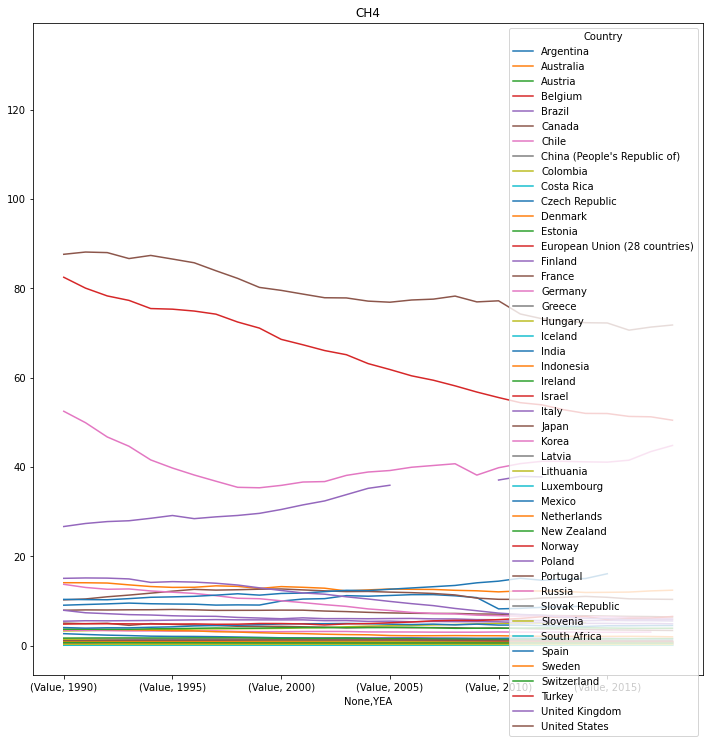

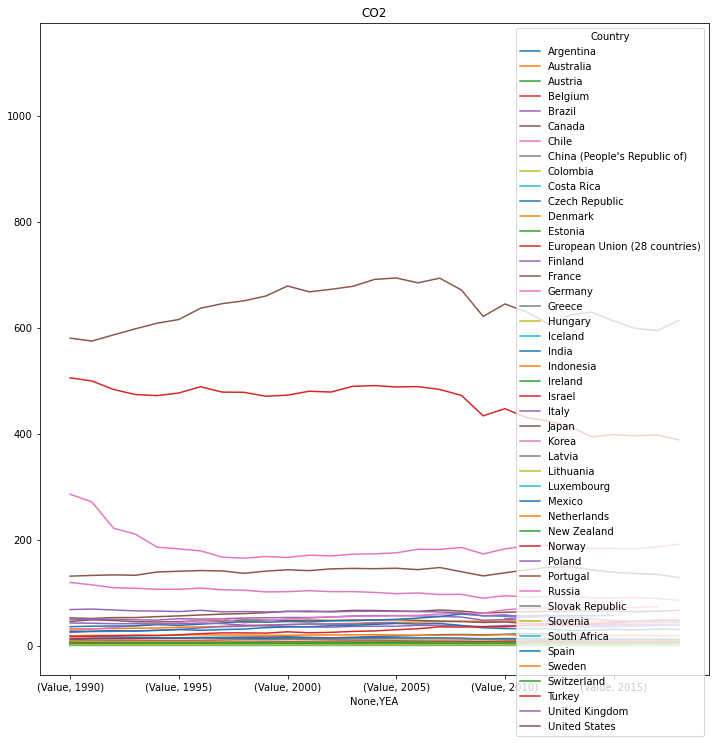

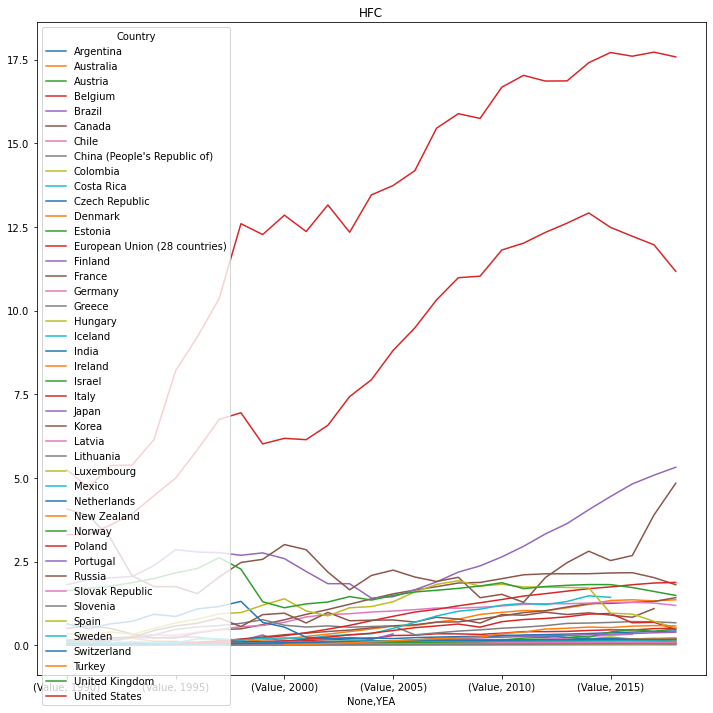

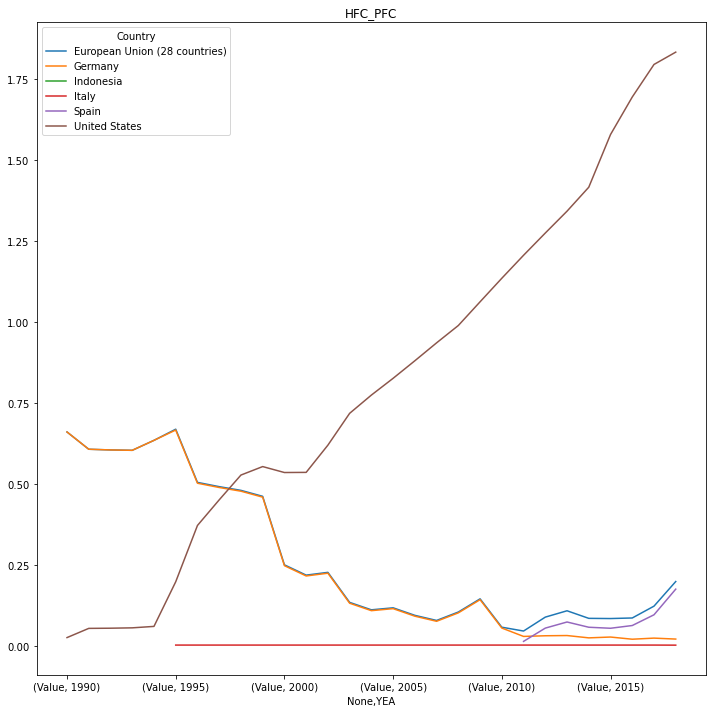

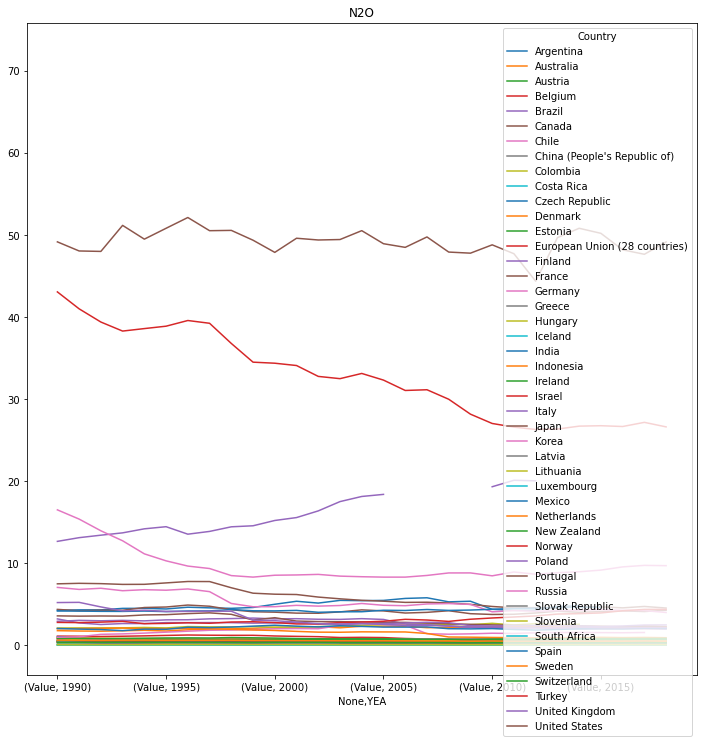

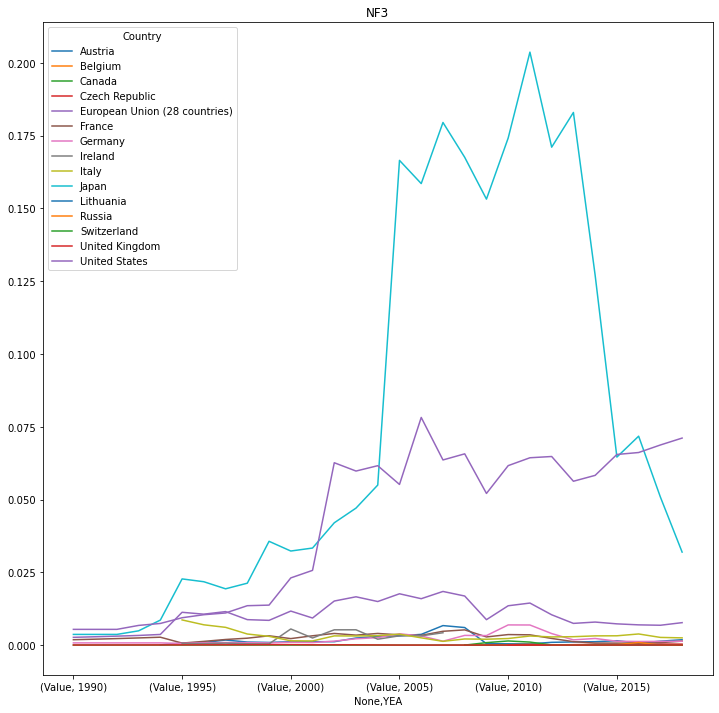

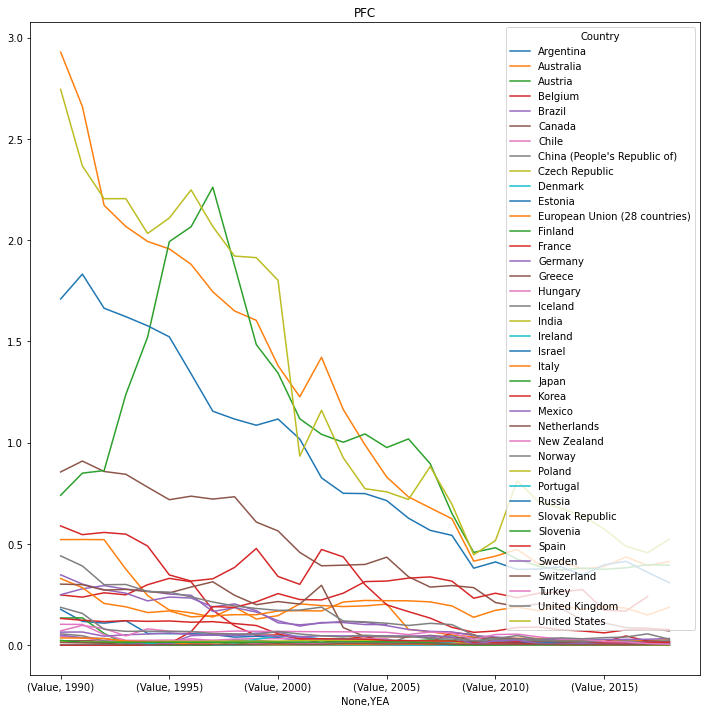

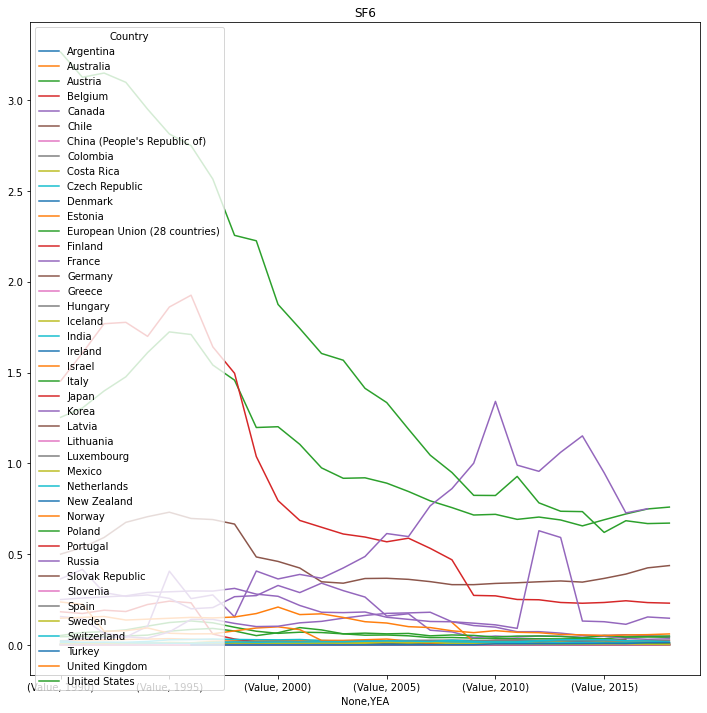

In [17]:
CH4.set_index('Country').transpose().plot(figsize=(12,12), title='CH4')
CO2.set_index('Country').transpose().plot(figsize=(12,12), title='CO2')
HFC.set_index('Country').transpose().plot(figsize=(12,12), title='HFC')
HFC_PFC.set_index('Country').transpose().plot(figsize=(12,12), title='HFC_PFC')
N2O.set_index('Country').transpose().plot(figsize=(12,12), title='N2O')
NF3.set_index('Country').transpose().plot(figsize=(12,12), title='NF3')
PFC.set_index('Country').transpose().plot(figsize=(12,12), title='PFC')
SF6.set_index('Country').transpose().plot(figsize=(12,12), title='SF6')

## Autofill 2020

In [18]:
CH4 = CH4.transpose().fillna(method='ffill').transpose()
CO2 = CO2.transpose().fillna(method='ffill').transpose()
HFC = HFC.transpose().fillna(method='ffill').transpose()
HFC_PFC = HFC_PFC.transpose().fillna(method='ffill').transpose()
N2O = N2O.transpose().fillna(method='ffill').transpose()
NF3 = NF3.transpose().fillna(method='ffill').transpose()
PFC = PFC.transpose().fillna(method='ffill').transpose()
SF6 = SF6.transpose().fillna(method='ffill').transpose()

In [19]:
conc = [
    CH4[['Country', '2020']].set_index('Country'),
    CO2[['Country', '2020']].set_index('Country'),
    HFC[['Country', '2020']].set_index('Country'),
    HFC_PFC[['Country', '2020']].set_index('Country'),
    N2O[['Country', '2020']].set_index('Country'),
    NF3[['Country', '2020']].set_index('Country'),
    PFC[['Country', '2020']].set_index('Country'),
    SF6[['Country', '2020']].set_index('Country'),
]

res = pd.concat(conc, axis=1, join='outer')

In [20]:
res.columns = ['CH4', 'CO2', 'HFC', 'HFC_PFC', 'N2O', 'NF3', 'PFC', 'SF6']
res

,CH4,CO2,HFC,HFC_PFC,N2O,NF3,PFC,SF6
Argentina,8.82996,22.7416,0.0693818,NaN,4.83833,NaN,0.0180777,0.00020107
Australia,12.3937,47.0658,1.35579,NaN,2.27598,NaN,0.0267041,0.0258589
Austria,0.728541,7.54943,0.207606,NaN,0.398982,0.00186836,0.00367957,0.0432413
Belgium,0.888096,11.3387,0.505769,NaN,0.645222,7.30959e-05,0.0148592,0.010758
Brazil,37.77,57.5924,0.335675,NaN,20.0618,NaN,0.10161,NaN
Canada,10.3448,66.3639,1.41953,NaN,4.29348,1.35782e-05,0.0702708,0.0350086
Chile,1.57707,9.94481,0.324684,NaN,0.759105,NaN,0,0.0308075
China (People's Republic of),132.829,1119.44,17.4839,NaN,72.2586,NaN,1.31143,2.70432
Colombia,5.10552,9.12219,0.213939,NaN,2.58291,NaN,NaN,0.0177241
Costa Rica,0.448872,0.902859,0.0684024,NaN,0.122769,NaN,NaN,0.000219514


In [21]:
# todo value per area
# todo value per inhabitants

In [22]:
res.to_csv('./data/OECD/greenhouse_gases_2020_pred.csv')